In [ ]:
import pandas as pd
import numpy as np
import nltk
import csv
import re 

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from keras import utils
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content1')

Mounted at /content1


In [ ]:
data = pd.read_csv('/content1/My Drive/content/spam.csv', encoding='latin-1')
data.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
data['v2'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.shape

(5572, 5)

In [ ]:
data.describe()

v1                      v2  \
count   5572                    5572   
unique     2                    5163   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2

In [ ]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
data.duplicated().sum()

409

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

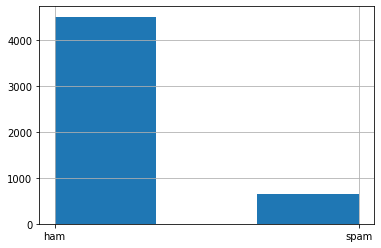

In [ ]:
data['v1'].hist(bins=3)

In [ ]:
data['alpha_text'] = data['v2'].apply(lambda x: re.sub(r'[^a-zA-Z ]+', '', x.lower()))
data.head()  #Removing special characters

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
nltk.download('stopwords')
data['imp_text'] = data['alpha_text'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))
data.head()  #Removing stop words

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [ ]:
# Convert text into numbers(vector)

from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(data).toarray()
x

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

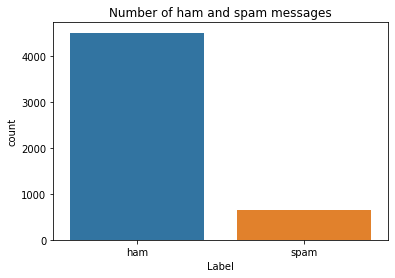

In [ ]:
sns.countplot(data.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
X = data.v2
Y = data.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = utils.pad_sequences(sequences,maxlen=max_len)

In [ ]:
sequences_matrix.shape

(4388, 150)

In [ ]:
sequences_matrix.ndim

2

In [ ]:
sequences_matrix = np.reshape(sequences_matrix,(4388,150,1))

In [ ]:
sequences_matrix.ndim

3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
model = Sequential()
model.add(Embedding(max_words,50,input_length=max_len))

In [ ]:
model.add(LSTM(units=64,input_shape = (sequences_matrix.shape[1],1),return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 64)           29440     
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
M = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,validation_split=0.2)

Epoch 1/5
28/28 [==============================] - 39s 1s/step - loss: 0.4512 - accuracy: 0.8481 - val_loss: 0.3856 - val_accuracy: 0.8702
Epoch 2/5
28/28 [==============================] - 34s 1s/step - loss: 0.3437 - accuracy: 0.8806 - val_loss: 0.2154 - val_accuracy: 0.9203
Epoch 3/5
28/28 [==============================] - 32s 1s/step - loss: 0.1025 - accuracy: 0.9701 - val_loss: 0.0576 - val_accuracy: 0.9795
Epoch 4/5
28/28 [==============================] - 32s 1s/step - loss: 0.0543 - accuracy: 0.9852 - val_loss: 0.0499 - val_accuracy: 0.9863
Epoch 5/5
28/28 [==============================] - 29s 1s/step - loss: 0.0363 - accuracy: 0.9912 - val_loss: 0.0482 - val_accuracy: 0.9841


In [ ]:
model.save('spam-classifier.h5')

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = utils.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

25/25 [==============================] - 4s 85ms/step - loss: 0.0870 - accuracy: 0.9794


In [ ]:
print("Accuracy of the model on Testing Data is - " , accr[1]*100 , "%")

Accuracy of the model on Testing Data is -  97.93548583984375 %


In [ ]:
l = accr[0]
a =accr[1]
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(l,a))

Test set
  Loss: 0.087
  Accuracy: 0.979
